In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import defaultdict

Kelly = ['#af2337', '#ecc342', '#2967a0', '#2f3c28', '#96b437',
         '#da93ab', '#e58932', '#80598f', '#7e331f', '#3b855a',
         '#c0b286', '#a9c9ed', '#ec977f', '#848482', '#604628',
         '#d26034', '#a64c6b', '#dbd245', '#eba83b', '#5d5092',
         '#222222', '#f2f3f4']

mpl.rcParams['axes.prop_cycle'] = plt.cycler(color=Kelly)
mpl.rcParams['axes.titlesize'] = 19
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 13
mpl.rcParams['legend.markerscale'] = 2
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['figure.dpi'] = 100

In [2]:
# set a seed for reproducible results
np.random.seed(100)

# generate a random prior
priors = np.random.random(9)
priors = priors / priors.sum()
priors

array([0.14111979, 0.07229126, 0.11024528, 0.21938451, 0.00122547,
       0.03157095, 0.17419048, 0.21447019, 0.03550208])

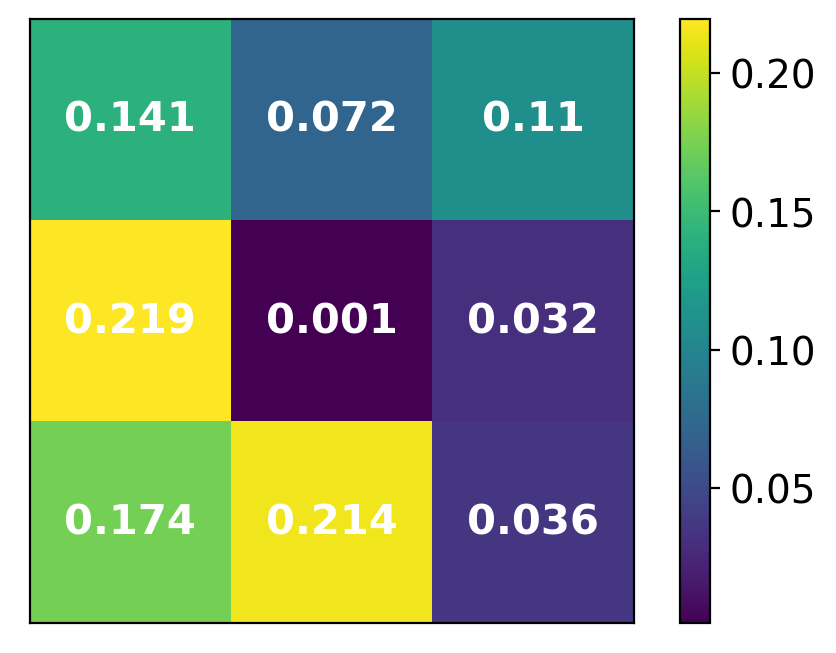

In [3]:
# have a look at the priors

heatmap_priors = priors.reshape((3,3))
plt.imshow(heatmap_priors, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks([])
plt.yticks([])

for r in range(3):
    for c in range(3):
        plt.annotate(round(heatmap_priors[r][c],3), (c,r),
                     color='w', fontsize=15, fontweight='bold',
                     ha='center', va='center')
plt.show()

In [4]:
# set the conditional probability of finding the object given it is there

## we used a uniform probability here for simplicity
p = np.array([0.2] * 9)
p

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])

In [5]:
# just look at each cell in order without learning from the search results

# create a list to hold the number of searches
sims1 = []
# we let the true location of the object in the 4th cell
loc = 3

# now we start searching and do this 10,000 times
for _ in range(10000):
    # initialisation
    find = False
    num_search = 0
    # start the search
    while not find:
        for f in range(9):
            num_search += 1
            if f == loc and np.random.random() <= p[f]:
                find = True
                break
    # record the number of searches
    sims1.append(num_search)

In [6]:
# using the Bayesian search theory, learning from the search results

# create a list to hold the number of searches
sims2 = []

# we let the true location of the object in the 4th cell
loc = 3

# we need some location probability history during the simulation
# to get a rough idea about what is going one
history = defaultdict(list)

# start finding
for s in range(10000):
    
    # initialisation
    location_prob = priors.copy()
    find = False
    num_search = 0
    
    # start the search
    while not find:
        f = np.argmax(location_prob * p)
        # record the current location probability
        history[s].append(np.round(location_prob, 4))
        num_search += 1
        if f == loc and np.random.random() <= p[f]:
            find = True
        else:
            # update the probability
            # which you should figure out during your homework
            for i in range(9):
                if i == f:
                    location_prob[i] = (1 - p[i]) * location_prob[i]/(1 - p[i]*location_prob[i])
                else:
                    location_prob[i] = location_prob[i]/(1 - p[i] * location_prob[i])

    # record the number of searches
    sims2.append(num_search)

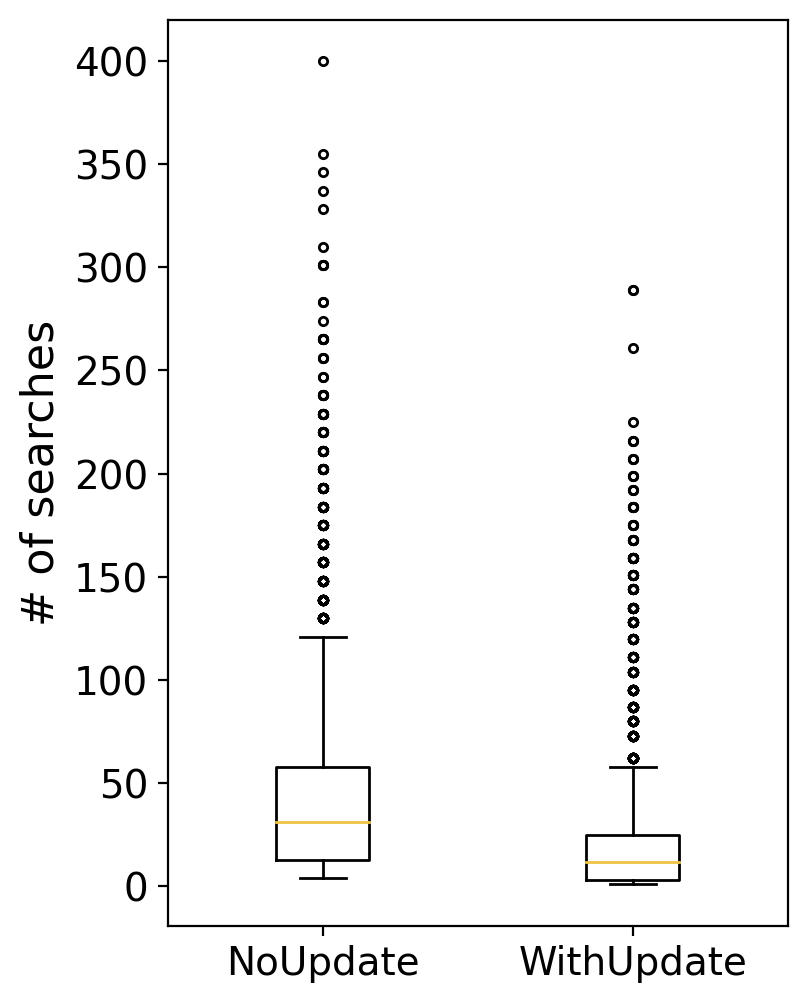

In [7]:
plt.subplots(figsize=(4,6))
plt.boxplot([sims1, sims2], widths=[0.3,0.3], flierprops={'markersize' : 3},
            labels=['NoUpdate', 'WithUpdate'])
plt.ylabel('# of searches')
plt.show()

In [8]:
# let's use heatmap to look at a simulation with 12 searches
for h in range(10000):
    if len(history[h]) == 12:
        print(h)
        break

4


In [9]:
# it seems in simulation #4, it took us 12 searches
history[4]

[array([0.1411, 0.0723, 0.1102, 0.2194, 0.0012, 0.0316, 0.1742, 0.2145,
        0.0355]),
 array([0.1452, 0.0734, 0.1127, 0.1836, 0.0012, 0.0318, 0.1805, 0.2241,
        0.0358]),
 array([0.1496, 0.0744, 0.1153, 0.1906, 0.0012, 0.032 , 0.1872, 0.1877,
        0.036 ]),
 array([0.1542, 0.0756, 0.1181, 0.1585, 0.0012, 0.0322, 0.1945, 0.195 ,
        0.0363]),
 array([0.1591, 0.0767, 0.1209, 0.1637, 0.0012, 0.0324, 0.2024, 0.1623,
        0.0365]),
 array([0.1643, 0.0779, 0.1239, 0.1692, 0.0012, 0.0326, 0.1687, 0.1678,
        0.0368]),
 array([0.1699, 0.0792, 0.1271, 0.1401, 0.0012, 0.0328, 0.1746, 0.1736,
        0.0371]),
 array([0.1759, 0.0804, 0.1304, 0.1442, 0.0012, 0.033 , 0.1448, 0.1798,
        0.0374]),
 array([0.1823, 0.0817, 0.1339, 0.1484, 0.0012, 0.0333, 0.1491, 0.1492,
        0.0376]),
 array([0.1513, 0.0831, 0.1375, 0.153 , 0.0012, 0.0335, 0.1537, 0.1538,
        0.0379]),
 array([0.1561, 0.0845, 0.1414, 0.1578, 0.0012, 0.0337, 0.1585, 0.127 ,
        0.0382]),
 array([0.

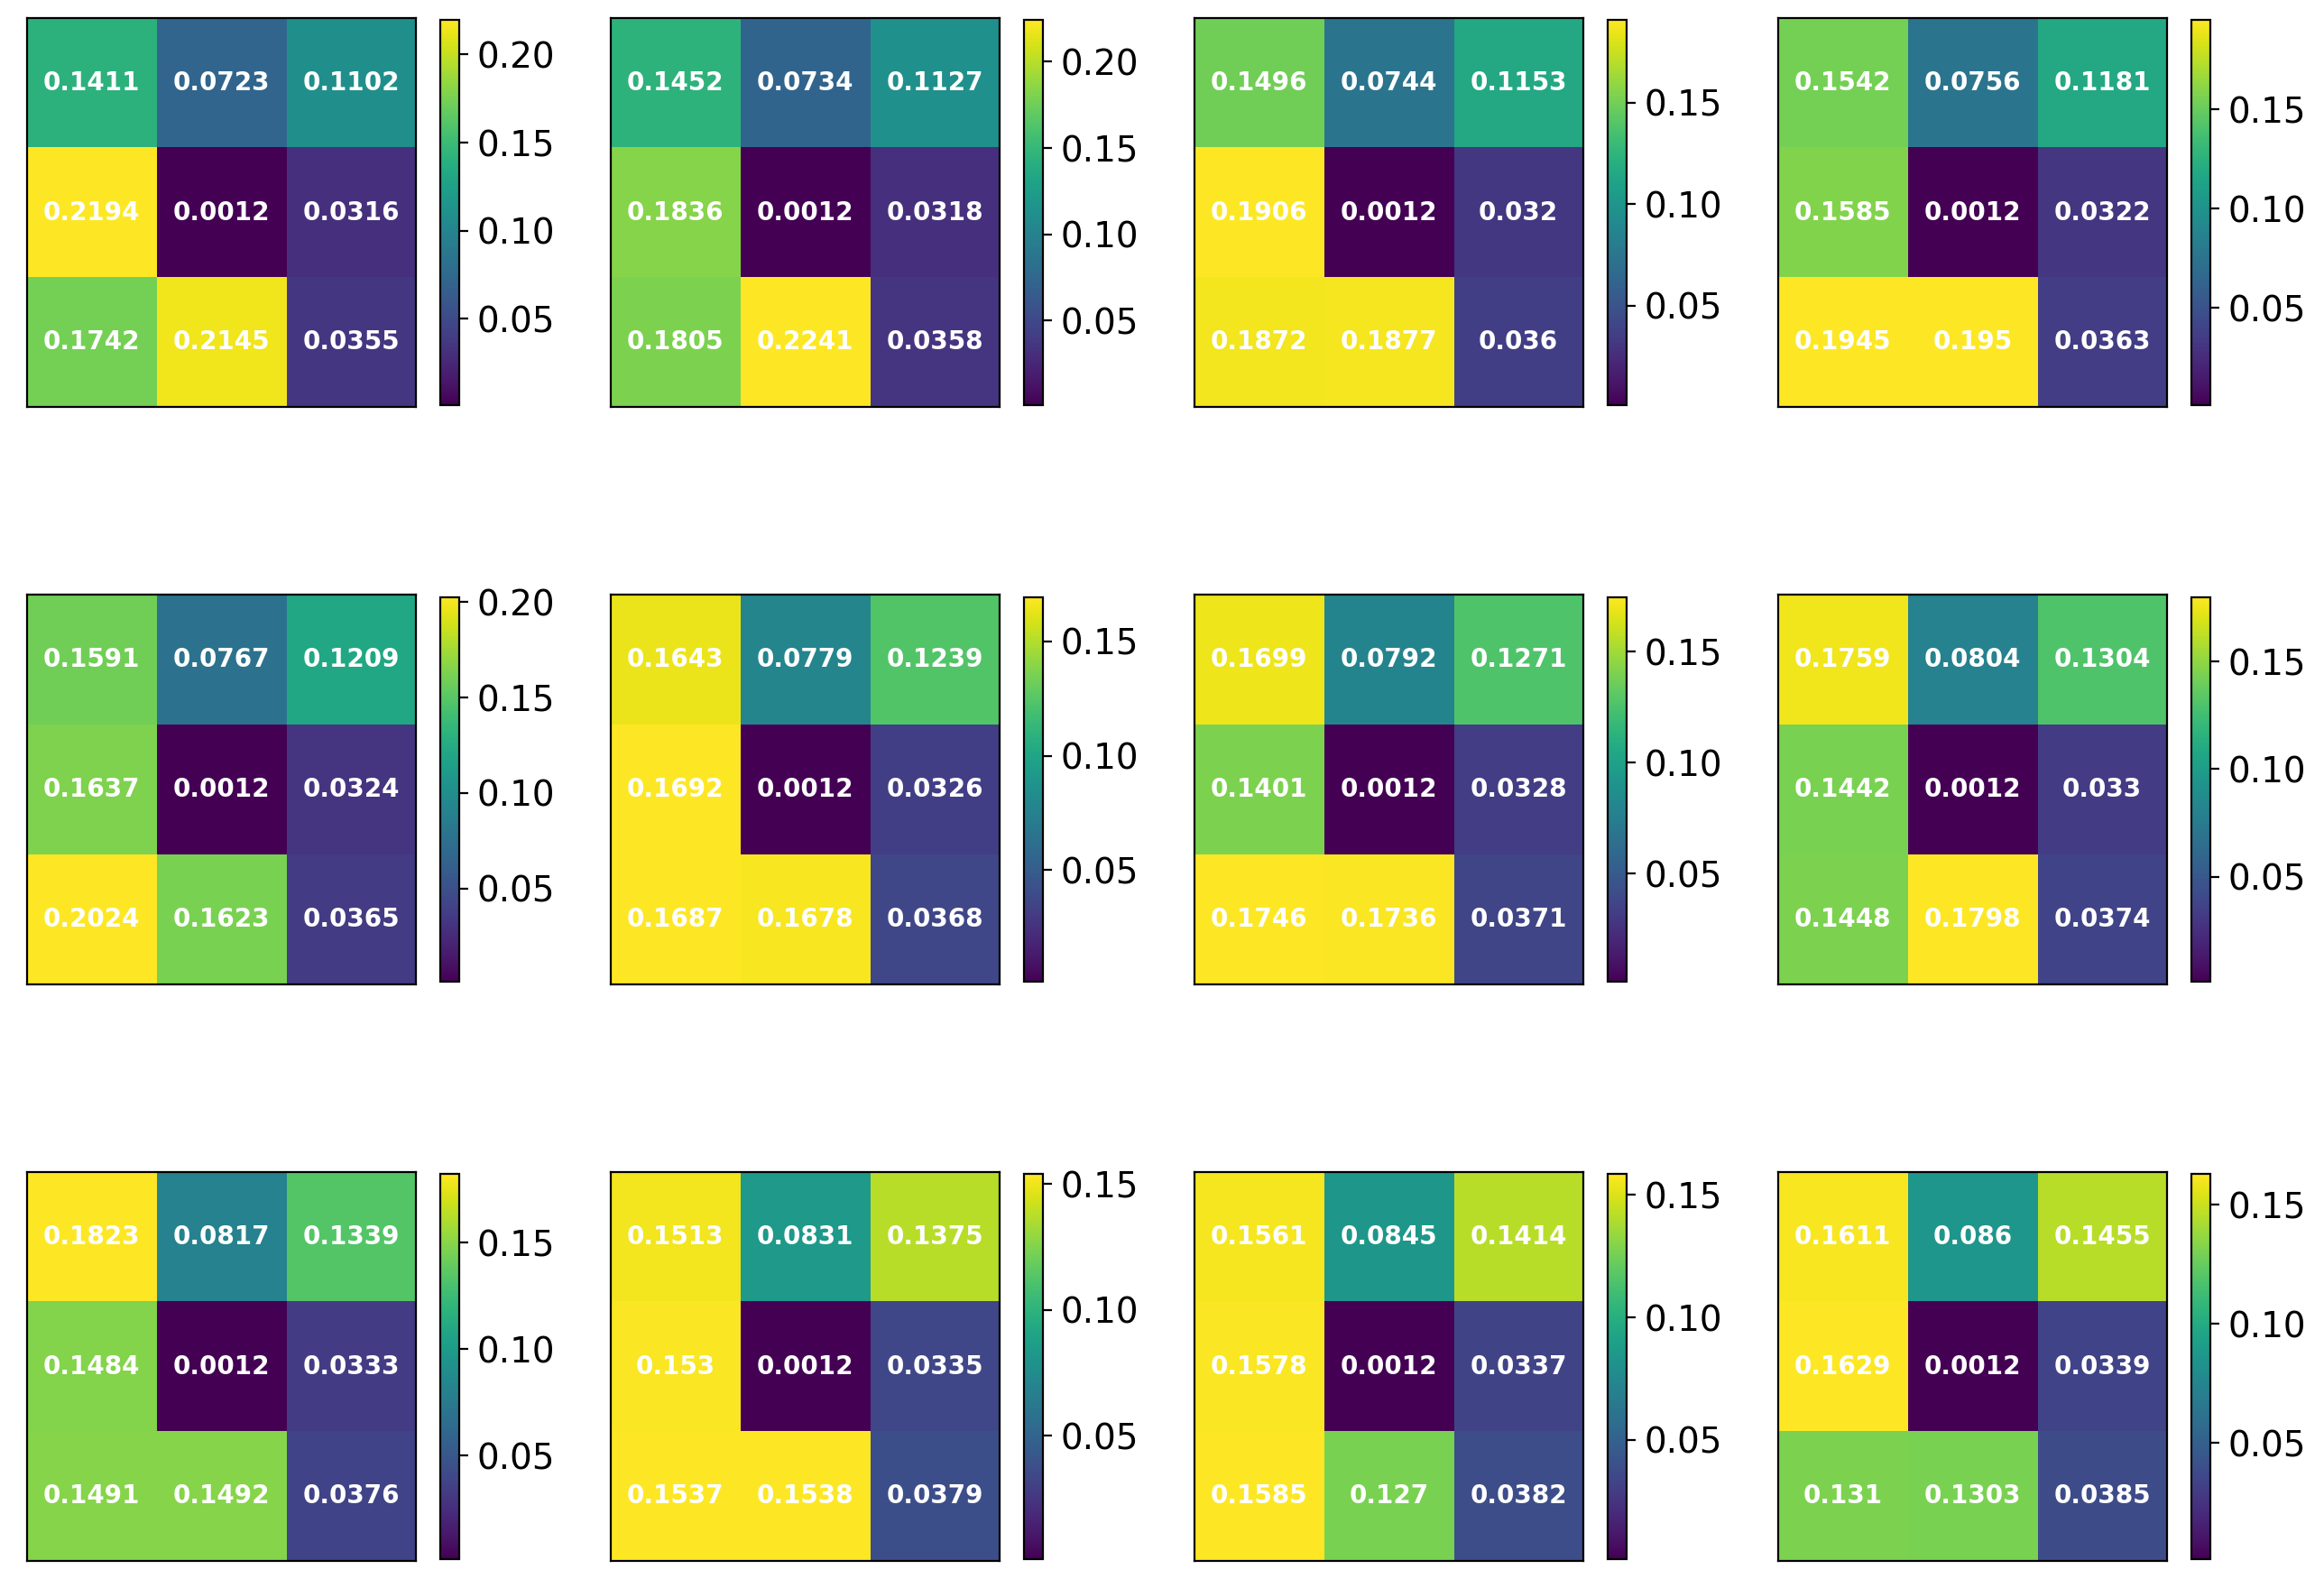

In [10]:
fig, axs = plt.subplots(figsize=(16,12), ncols = 4, nrows=3)
axs = axs.flatten()

for ax, pp in zip(axs, history[4]):
    heatmap_pp = pp.reshape((3,3))
    hm = ax.imshow(heatmap_pp, cmap='viridis', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    fig.colorbar(hm, ax=ax, location='right', shrink=0.8)

    for r in range(3):
        for c in range(3):
            ax.annotate(round(heatmap_pp[r][c],4), (c,r),
                        color='w', fontsize=10, fontweight='bold',
                        ha='center', va='center')
# plt.tight_layout()
plt.show()